<a href="https://colab.research.google.com/github/ArchitLimaye/OIBSIP/blob/main/Oasis_Infobyte_%7C_Data_Scientist_%7C_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 3**
**The price of a car depends on a lot of factors like the goodwill of the brand of the car,
 features of the car, horsepower and the mileage it gives and many more. Car price
 prediction is one of the major research areas in machine learning. So if you want to learn
 how to train a car price prediction model then this project is for you.**

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df=pd.read_csv("/content/car data.csv")
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
147,Yamaha FZ S V 2.0,2015,0.55,0.84,58000,Petrol,Individual,Manual,0
41,alto k10,2014,2.55,3.98,46706,Petrol,Dealer,Manual,0
245,verna,2012,5.20,9.40,71000,Diesel,Dealer,Manual,0
189,Hero Super Splendor,2005,0.20,0.57,55000,Petrol,Individual,Manual,0
94,corolla altis,2008,4.00,22.78,89000,Petrol,Dealer,Automatic,0


In [160]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [161]:
df.drop_duplicates(inplace=True)

In [164]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [166]:
df["Car_Age"]=2025-df["Year"]
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


<Axes: xlabel='Car_Age', ylabel='Selling_Price'>

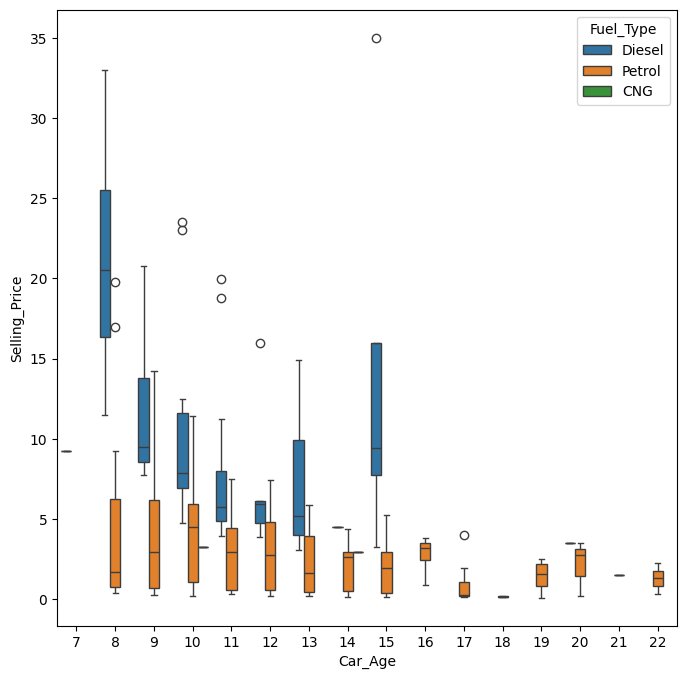

In [173]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="Car_Age",y="Selling_Price",hue="Fuel_Type")

In [175]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df.iloc[:,0]=encode.fit_transform(df.iloc[:,0])
df.iloc[:,-2]=encode.fit_transform(df.iloc[:,-2])
df.iloc[:,-3]=encode.fit_transform(df.iloc[:,-3])
df.iloc[:,-4]=encode.fit_transform(df.iloc[:,-4])
df.iloc[:,-5]=encode.fit_transform(df.iloc[:,-5])
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,90,2014,3.35,5.59,27000,2,0,1,0,11
1,93,2013,4.75,9.54,43000,1,0,1,0,12
2,68,2017,7.25,9.85,6900,2,0,1,0,8
3,96,2011,2.85,4.15,5200,2,0,1,0,14
4,92,2014,4.60,6.87,42450,1,0,1,0,11


In [176]:
df.corr()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
Car_Name,1.000000,0.014713,0.501429,0.474651,0.064077,-0.368454,-0.829255,-0.055072,-0.096886,-0.014713
Year,0.014713,1.000000,0.234369,-0.053167,-0.525714,-0.046210,-0.036820,0.003434,-0.170694,-1.000000
Selling_Price,0.501429,0.234369,1.000000,0.876305,0.028566,-0.500292,-0.553851,-0.348869,-0.096019,-0.234369
Present_Price,0.474651,-0.053167,0.876305,1.000000,0.205224,-0.431887,-0.511779,-0.334326,-0.018158,0.053167
Driven_kms,0.064077,-0.525714,0.028566,0.205224,1.000000,-0.167287,-0.101030,-0.163881,0.061924,0.525714
Fuel_Type,-0.368454,-0.046210,-0.500292,-0.431887,-0.167287,1.000000,0.347922,0.068618,0.055526,0.046210
Selling_type,-0.829255,-0.036820,-0.553851,-0.511779,-0.101030,0.347922,1.000000,0.058669,0.123165,0.036820
Transmission,-0.055072,0.003434,-0.348869,-0.334326,-0.163881,0.068618,0.058669,1.000000,-0.020306,-0.003434
Owner,-0.096886,-0.170694,-0.096019,-0.018158,0.061924,0.055526,0.123165,-0.020306,1.000000,0.170694
Car_Age,-0.014713,-1.000000,-0.234369,0.053167,0.525714,0.046210,0.036820,-0.003434,0.170694,1.000000


<Axes: >

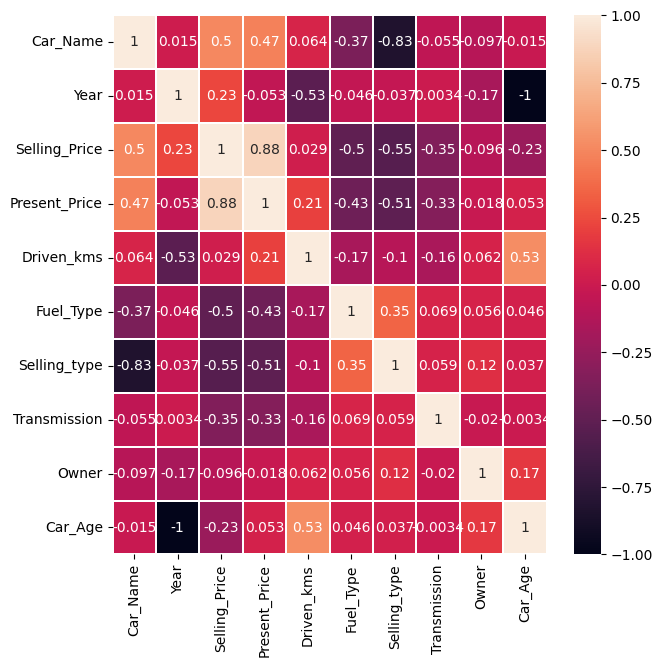

In [177]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.2)

In [185]:
x=df.drop(columns=["Selling_Price","Owner","Driven_kms"])
y=df['Selling_Price']

In [186]:
from sklearn.preprocessing import StandardScaler
pre=StandardScaler()
x=pre.fit_transform(x)

In [187]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=48)

In [188]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [190]:
from sklearn.metrics import mean_squared_error,r2_score
pred=np.round(pred)
mse=mean_squared_error(pred,y_test)
r2=r2_score(pred,y_test)
print(mse,r2)

2.886610833333333 0.8987982645787075
